In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

In [23]:
DATA_PATH = "S05-hw-dataset.csv"
df = pd.read_csv(DATA_PATH)

df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [25]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [27]:
print("Распределение таргета:")
print(df['default'].value_counts(normalize=True))

Распределение таргета:
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


Таргет дефолта распределен примерно 59 на 41. Явных аномалий и прпусков не обнаружено.

In [29]:
# Разделение данных на обучающую и тестовую выборки:
X = df.drop(columns=["default", "client_id"]) # матрица признаков
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# Построение бейзлайн-модели на основе DummyClassifier
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test) # предсказание
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy) # метрики качества
roc_dummy = roc_auc_score(y_test, y_proba_dummy)
print(f"Dummy accuracy: {acc_dummy:.3f}")
print(f"Dummy ROC-AUC: {roc_dummy:.3f}")

Dummy accuracy: 0.590
Dummy ROC-AUC: 0.500


In [34]:
C_values = [0.01, 0.1, 1.0, 10.0]
results = []

for C in C_values:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(C=C, max_iter=1000))
    ])
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test) # предсказания
    y_proba = pipe.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred) # метрики
    roc = roc_auc_score(y_test, y_proba)
    results.append((C, acc, roc))

# Результат побора
results_df = pd.DataFrame(results, columns=["C", "accuracy", "roc_auc"])
print(results_df)


       C  accuracy   roc_auc
0   0.01  0.806667  0.875442
1   0.10  0.801667  0.875477
2   1.00  0.800000  0.875614
3  10.00  0.800000  0.875637


Best C: 10.0


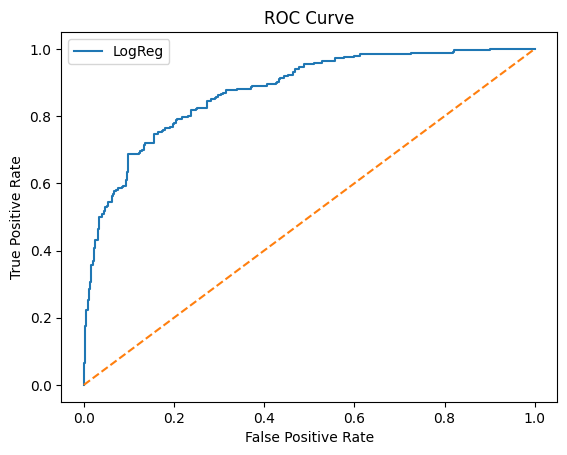

In [37]:
# Выбор лучшей модели С по ROC-AUC
best_C = results_df.sort_values("roc_auc", ascending=False).iloc[0]["C"]
print(f"Best C: {best_C}")

best_model = Pipeline([ 
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=best_C, max_iter=1000))
])

best_model.fit(X_train, y_train)

y_proba_best = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_best)

plt.figure()
plt.plot(fpr, tpr, label="LogReg")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig('figures/roc_curve.png', dpi=150, bbox_inches='tight')
plt.show()

In [32]:
# Сравнение байзлайна и логистической модели
comparison = pd.DataFrame({
"model": ["Dummy", "LogisticRegression"],
"accuracy": [acc_dummy, accuracy_score(y_test, best_model.predict(X_test))],
"roc_auc": [roc_dummy, roc_auc_score(y_test, y_proba_best)]
})


print(comparison)


# === Итоговые выводы ===
# Логистическая регрессия существенно превосходит бейзлайн по ROC-AUC.
# Accuracy также увеличилась по сравнению с DummyClassifier.
# Подбор параметра C показывает влияние регуляризации на качество.
# Модель с умеренной регуляризацией показывает наилучший баланс качества и устойчивости.

# Итоговые выводы:
# 1. Логистическая регрессия заметно превосходит бейзлайн по ROC-AUC.
# 2. Accuracy также выше, чем у DummyClassifier.
# 3. Подбор параметра C показывает влияние регуляризации на качество.
# 4. Полученная модель является разумным базовым решением задачи дефолта.

                model  accuracy   roc_auc
0               Dummy      0.59  0.500000
1  LogisticRegression      0.80  0.875637


Для бейзлайна значение accuracy оказалось умеренным, однако ROC-AUC близок к 0.5, что означает случайное угадывание. Логистическая регрессия существенно превосходит бейзлайн по качеству. По сравнению с DummyClassifier, accuracy увеличилась в процентах, а ROC-AUC значительно вырос, что указывает на хорошую способность модели ранжировать клиентов по риску дефолта. Логистическая регрессия использует все признаки и извлекает из них полезную информацию, в то время как бейзлайн предсказывает наиболее частый класс.
Логистическая регрессия значительно лучше бейзлайна. ROC-AUC является более информативной метрикой, чем accuracy, так как отражает способность модели ранжировать клиентов по риску, а не просто угадывать класс. Логистическая регрессия является хорошей моделью для данной задачи, в отчичие от бейзлайна.
    
    